In [1]:
include("../src/coherent_vertex.jl")
using .coherent_vertex

# use the following packages for the computation 
using JLD2, DelimitedFiles, Memoize, BenchmarkTools, Plots

In [2]:
# face normal vectors for an equilateral tetrahedron
nn= [[0.0, 0.0, 1.0], [0.0, 2sqrt(2)/3, -1/3], 
    [sqrt(2/3), -sqrt(2)/3, -1/3], 
    [-sqrt(2/3), -sqrt(2)/3, -1/3]];

In [3]:
function cohn_vertex(i)
    cohn_vertex1(i*ones(10),[nn,nn,nn,nn,nn])
end


cohn_vertex (generic function with 1 method)

In [4]:
@time cohn_vertex(10)

  0.733515 seconds (3.24 M allocations: 188.255 MiB, 5.10% gc time, 94.06% compilation time)


-3.6850530841103763e-10 + 6.38269917026736e-10im

In [8]:
xx = 0:0.5:20
@time camp = [i^6*cohn_vertex(i) for i in xx]; 

  0.898557 seconds (13.08 M allocations: 820.841 MiB, 14.04% gc time, 2.20% compilation time)


In [9]:
ramp=[-(-1+0im)^0k*exp(-im*angle(camp[3])*k)*camp[Int(2k+1)] for k in xx];

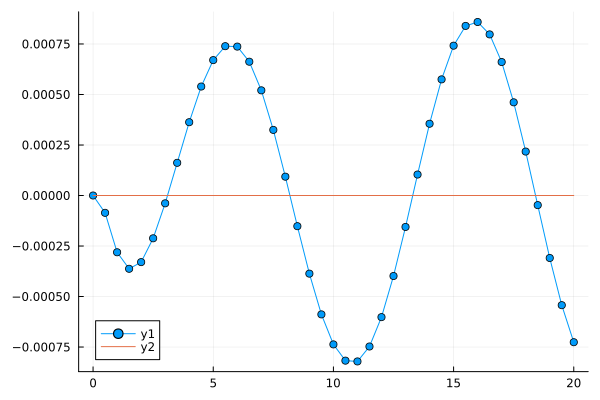

In [10]:
plot(xx,real(ramp),m=:c)
plot!(xx,imag(ramp))